# 회귀모델 유형 실습

### 라이브러리 선언

In [9]:
import pandas as pd
import numpy as np

# 모델 라이브러리 선언
from sklearn import tree ## 사이킷런, 스태츠모델

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# CSV 파일을 읽어 DataFrame 변수에 저장하기
featuresData = pd.read_csv("../dataset./feature_regression_example.csv")

### (1) 타입통합 / 특성 숫자컬럼 추가

In [10]:
# 데이터 타입 통합
featuresData = featuresData.astype({"YEARWEEK":int,
                                    "YEAR":int,
                                    "WEEK":int})

### 특성숫자변환: np.where 방식

In [11]:
# 특성 숫자컬럼 추가
featuresData["HO_YN"] = np.where(featuresData.HOLIDAY == "Y", 1,0)
featuresData["PRO_YN"] = np.where(featuresData.PROMOTION == "Y", 1,0)
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1


### 특성숫자변환: label 인코더 방식

In [12]:
from sklearn.preprocessing import LabelEncoder
# 인코딩 수행
le_ho = LabelEncoder() 
le_pro = LabelEncoder()
featuresData["HO_YN"] = \
            le_ho.fit_transform(featuresData.HOLIDAY)
featuresData["PRO_YN"] = \
            le_pro.fit_transform(featuresData.PROMOTION)

# 다시 인코딩된 내용을 디코딩 후 기존값과 비교
featuresData["HO_DECO"] = \
            le_ho.inverse_transform(featuresData.HO_YN)
featuresData["PRO_DECO"] = \
            le_pro.inverse_transform(featuresData.PRO_YN)

In [13]:
featuresData.drop(columns=["HO_DECO","PRO_DECO"],inplace=True)

### 특성숫자변환: 딕셔너리 활용

In [14]:
binarymap = {"Y":1, "N":0}

featuresData["HO_YN"] = featuresData.HOLIDAY.map(binarymap)
featuresData["PRO_YN"] = featuresData.PROMOTION.map(binarymap)
featuresData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1


### 특성숫자변환: get dummies

In [15]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN'],
      dtype='object')

In [16]:
featuresData = pd.concat( [ featuresData,
             pd.get_dummies(prefix="PROMO_DU",\
                          data = featuresData.PROMOTION)],
          axis=1   )

In [17]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN', 'PROMO_DU_N', 'PROMO_DU_Y'],
      dtype='object')

In [18]:
len(featuresData)

105

In [19]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PROMO_DU_N,PROMO_DU_Y
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1,0,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1,0,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1,0,1


In [20]:
featuresData.drop(columns=["PROMO_DU_Y","PROMO_DU_N"], inplace=True)

In [21]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT', 'HO_YN',
       'PRO_YN'],
      dtype='object')

### (2) 특성선정 / 데이터 분리

In [22]:
corrDf = featuresData.corr(method="pearson")
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [23]:
# 상관관계 확인
corrdf = featuresData.corr()
corrdf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HO_YN,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PRO_YN,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [24]:
# 상관관계 계수 비율 선정
featuresStd = 0.5 

# 특성 추출
features = list( corrDf.loc[ ( abs( corrDf.QTY ) > featuresStd ) & 
                       ( abs( corrDf.QTY ) != 1) ].index )
print(features)

# 정답지 추출
label = ['QTY'] 
print(label)

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']
['QTY']


In [25]:
# 데이터 분리
yearweekStd = 201630

# 훈련 데이터
trainingData_features = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd][features]
trainingData_label = \
    featuresData.loc[featuresData.YEARWEEK <= yearweekStd][label]
# 테스트 데이터
testData_features = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd][features]
testData_label = \
    featuresData.loc[featuresData.YEARWEEK > yearweekStd]
print(trainingData_features.shape)
print(trainingData_label.shape)
print(testData_features.shape)
print(testData_label.shape)

(83, 4)
(83, 1)
(22, 4)
(22, 14)


In [26]:
trainingData_features

,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
0,1,0.209442,1,1
1,4,0.209442,0,1
2,4,0.208155,0,1
3,2,0.208155,1,1
4,4,0.208155,0,1
...,...,...,...,...
78,1,0.308584,1,1
79,1,0.308584,1,1
80,1,0.308584,1,1
81,1,0.308584,1,1


### (3) 모델 적용

In [27]:
# 모델 정의
model_method = \
    tree.DecisionTreeRegressor(random_state=1)

# 머신 러닝 (훈련데이터 특성/답지)
model = model_method.fit(X=trainingData_features, 
                         y=trainingData_label)

In [28]:
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

### (4) 예측

In [29]:
predict = model.predict( X = testData_features)
predict

array([1606.5       , 1606.5       ,  350.71428571, 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ,
       1606.5       , 1606.5       , 2620.42857143, 1606.5       ,
        350.71428571, 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       ])

#  5. 데이터 정리

In [30]:
### 예측결과를 데이터프레임으로 변환
predictData = pd.DataFrame(predict, columns = ["PREDICT"])

### 테스트데이터 정답지 인덱스 초기화
testData_label.reset_index(drop=True, inplace=True)

### 에측결과 / 정답지 병합
finalReuslt = pd.concat( [testData_label, predictData], axis=1)

In [31]:
finalReuslt.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HO_YN,PRO_YN,PREDICT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201631,2016,31,1522,N,4,Y,0.280258,0,1,1606.500000
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,0,1,1606.500000
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000


# 다른 풀이 방식

In [32]:
# 테스트 데이터 결과 정리
testData_label["PREDICT"] = predict

testData_label.loc[:,["QTY","PREDICT"]]

<ipython-input-32-f1bde502d21f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData_label["PREDICT"] = predict


,QTY,PREDICT
0,1522,1606.500000
1,2100,1606.500000
2,43,350.714286
3,1700,1434.600000
4,1514,1434.600000
5,1501,1434.600000
6,1491,1434.600000
7,806,1434.600000
8,2111,1606.500000
9,2400,1606.500000


### (6) 결과 검증

In [33]:
# MAE 지표
pMae = mean_absolute_error(y_true = testData_label['QTY'], 
                           y_pred = testData_label['PREDICT'])  

print(pMae)
# RMSE 지표
pRmse = np.sqrt(mean_squared_error(y_true = testData_label['QTY'], 
                                   y_pred = testData_label['PREDICT']) )

print(pRmse)


460.25259740259736
603.7396042425769


### (7) 결과 시각화 및 분석

In [34]:
from sklearn.externals.six import StringIO  ##pip install "scikit_learn==0.22.2.post1"

In [35]:
from IPython.display import Image

In [36]:
from sklearn.tree import export_graphviz

In [37]:
import pydotplus

In [38]:
# # sklearn의 트리모델 및 graphviz 라이브러리 선언
# # from sklearn.tree import export_graphviz
# # import graphviz

# # graphviz로 tree.dot 출력
# export_graphviz(model, 
#                 out_file=dot_data,
#                 rounded=True,
#                 special_characters=True)

# # tree.dot 파일을 불러와서 화면에 시연
# with open("tree.dot") as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

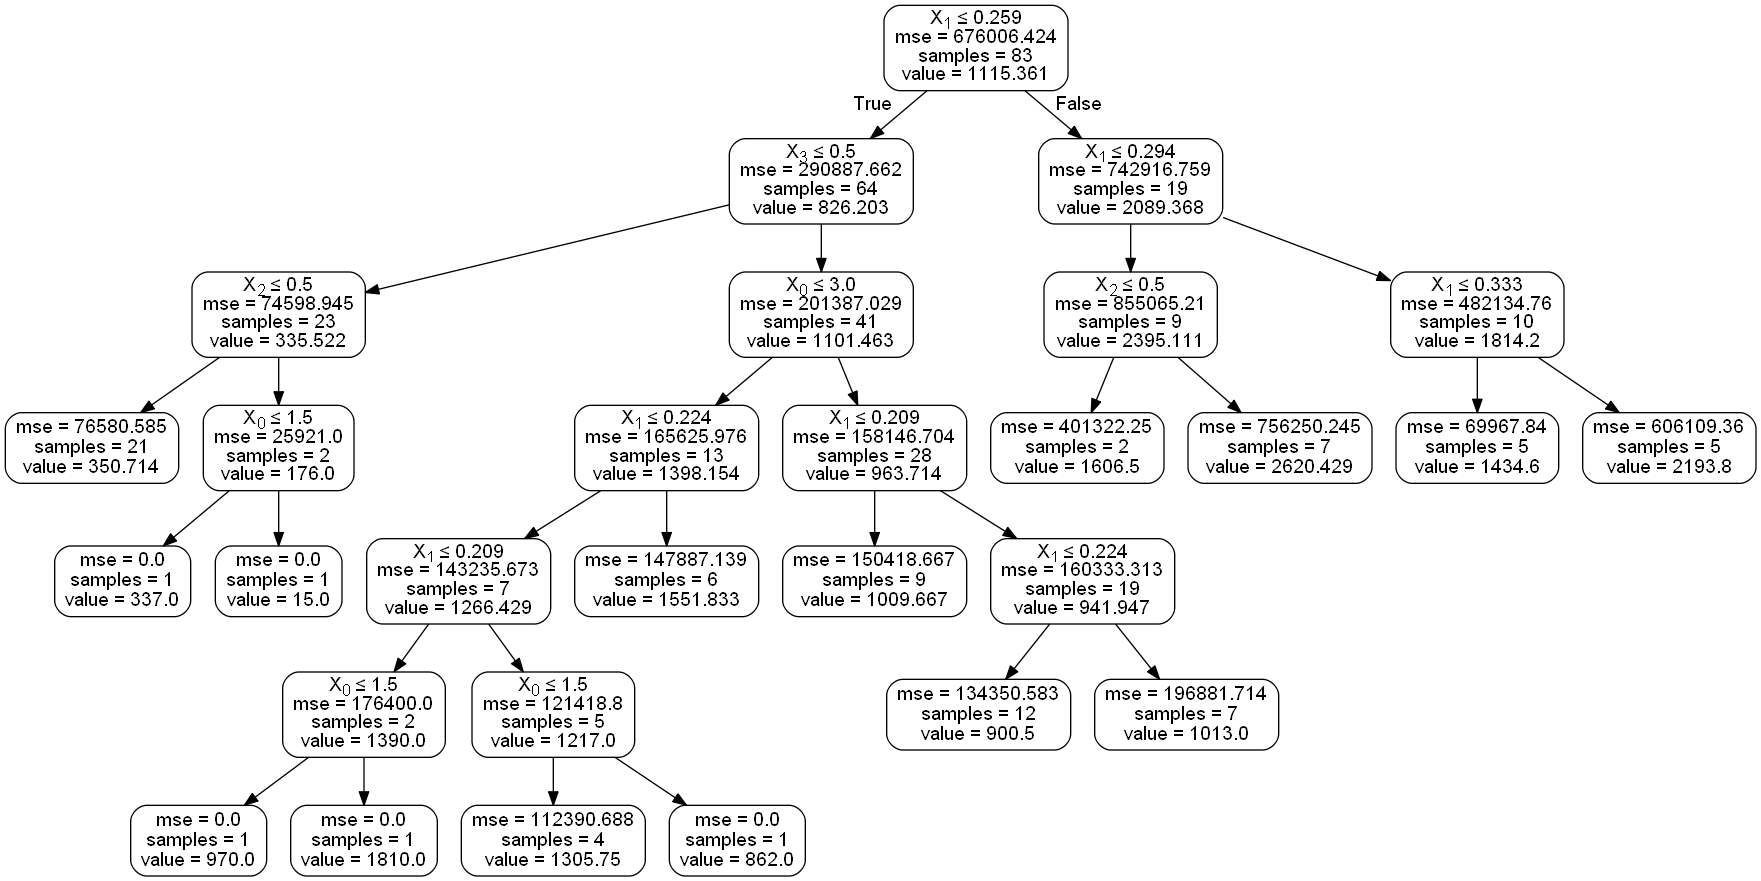

In [39]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [42]:
features

['HCLUS', 'PRO_PERCENT', 'HO_YN', 'PRO_YN']

In [47]:
# 전체 건수 확인
print(len(trainingData_features))

# tree1 건수 확인
treeOne = trainingData_features.\
    loc[trainingData_features.PRO_PERCENT > 0.259] 
len(treeOne)

83


19

In [48]:
# tree2 건수 확인
treeTwo = treeOne.loc[treeOne.PRO_PERCENT > 0.294]
len(treeTwo)

10

In [49]:
# tree3 건수 확인
treeThree = treeTwo.loc[treeOne.PRO_PERCENT > 0.333]
treeThree

,HCLUS,PRO_PERCENT,HO_YN,PRO_YN
44,0,0.357511,1,1
45,0,0.357511,1,1
46,0,0.357511,1,1
47,0,0.357511,1,1
48,0,0.357511,1,1


In [50]:
# 훈련데이터 동일 인덱스의 실 판매량 평균
trainingData_label.loc[44:48,"QTY"]

44    1454
45    2033
46    2033
47    3691
48    1758
Name: QTY, dtype: int64

In [51]:
model.feature_importances_

array([0.05687983, 0.68133987, 0.04206471, 0.21971559])

### [실습-모델변화]
기존 데이터를 활용하여
Decision Tree 로직 외에 
Linear Regression or Randomforest 로직을
구현하세요


In [52]:
# 모델 라이브러리 선언
from sklearn import datasets, linear_model

# Define Model
model_method = linear_model.LinearRegression()

### [실습-데이터변화]
github (hyokwan) 내 cars.csv 파일을 열고
sales를 예측하세요 
다음장에 데이터의 설명이 존재합니다.


### [실습-카테고리 데이터]
kopo_decision_tree_all_new.csv 파일을 열고
판매량을 예측하는 모델을 생성하세요
[단, REGIONID, PRODUCTGROUP, PRODUCT, ITEM별데이터가 최대 (146) 건 대상에 대해서 
,201700 기준으로 분리]

“머신러닝_홍길동” 이름으로 저장 후 haiteam@kopo.ac.kr 제출

In [33]:
# from sklearn.externals import joblib
# joblib.dump(model, "./trainingset.model")
# loaded_model = joblib.load("./trainingset.model")
# loaded_model.predict(feature_test)